<left> <h1> <center> Project 2: Training Neural Networks using Non Linear Least Squares </center> </h1> </left>

## Neural Network Definition
We consider a neural network that approximates a non-linear function $g(\textbf{x})$ to be a function of the form:
$$\hat{y} = f_w (\textbf{x}) = w_1 \phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) + w_6 \phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) + w_{11} \phi (w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) + w_{16} \quad$$ 
Where the scalar output is $\hat{y} \in \mathbb{R}$, the vector input is $\textbf{x} \in \mathbb{R}^3$, and the weights that parametrize the network are $\textbf{w} \in \mathbb{R}^{16}$ and $\phi$: $\mathbb{R} \rightarrow \mathbb{R}$  is defined as:
$$\phi(\textbf{x}) = \tanh(\textbf{x}) = \frac{e^\textbf{x} - e^{-\textbf{x}}}{e^\textbf{x} + e^{-\textbf{x}}} \qquad \text{(The hyperbolic tan function)}$$

## Non-linear Least Squares Objective
The goal is to determine the weights $w_1, ... w_{16}$ that best approximate a non-linear function $g(\textbf{x})$ by minimizing the sum of squared errors, defined as:
$$\sum_{n=1}^N (f_w(\textbf{x}^{(n)}) - y^{(n)})^2 = \sum_{n=1}^N r_n(w)^2$$
Where $y^{(n)}$ is the output of $g(\textbf{x})$ for the vector input $x^{(n)}$. 

## <center> Part 1 </center>
 The gradient of $f_w(\textbf{x})$ is given by:

$$
\nabla_w f_w(\textbf{x}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1}f_w(\textbf{x}) \\
\frac{\partial}{\partial w_2}f_w(\textbf{x}) \\
\vdots \\
\frac{\partial}{\partial w_{16}} f_w(\textbf{x})
\end{bmatrix}
=
\begin{bmatrix}
\phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_1 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_2 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_3 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
\phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_1 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_2 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_3 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
\phi(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_1 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_2 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_3 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
1
\end{bmatrix}
$$
Where $\phi'(x) = \frac{d}{dx} \bigg( \frac{e^x -e^{-x}}{e^x+e^{-x}} \bigg) = \frac{4e^{2x}}{(e^{2x}+1)^2}$

## <center> Part 2 </center>
$$\textbf{r}(w) = \big[ r_1 \quad r_2\quad ...\quad r_N \big] = \big[ f_w(\textbf{x}^{(1)}) - y^{(1)}\quad f_w(\textbf{x}^{(2)}) - y^{(2)} \quad ... \quad f_w(\textbf{x}^{(N)}) - y^{(N)} \big] $$
The gradient of the sum of squared error is:
$$\nabla_w \parallel \textbf{r}(w) \parallel^2 = \nabla_w \bigg( \sum_{n=1}^N r_n(w)^2 \bigg) = 2 \sum_{n=1}^N r_n(w) \dot \nabla_w r_n(w) \quad \text{(using the chain rule)} $$
Which can be rewritten as:
$$2(r_1(w)\nabla_w r_1(w) + r_2(w)\nabla_w r_2(w) + ... + r_N(w)\nabla_w r_N(w)) = 2 \big[\nabla_w r_1(w) \quad \nabla_w r_2(w)  \quad ... \quad \nabla_w r_N(w)\big] \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix}$$

$$ = 2 \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_1(w)\\
\vdots \\
\nabla_w r_1(w)
\end{bmatrix}^T \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix} = 2 \textbf{Dr}(w)^T\textbf{r}(w), \quad \text{where} \: \:\textbf{Dr}(w) = \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_2(w)\\
\vdots \\
\nabla_w r_N(w)
\end{bmatrix} = \begin{bmatrix}
\nabla_w f_w(x^{(1)})\\
\nabla_w f_w(x^{(2)})\\
\vdots \\
\nabla_w f_w(x^{(N)})
\end{bmatrix}$$
The last step is due to the fact that $r_n(w)$ is defined as $y^{(n)} - f_w(x^{(n)})$ which means $\nabla_w r_n(w) = \nabla_w f_w(x^{(n)})$, since $y^{(n)}$ is not a function of $w$.

## <center> Part 3 </center>

The training data for the neural network to approximate the non-linear function $g(\textbf{x}) = x_1 x_2 + x_3$ will consist of $N=500$ randomly generated points, $\mathbf{x}^{(n)} = \begin{bmatrix} x_1^{(n)} \\ x_2^{(n)} \\ x_3^{(n)} \end{bmatrix} \in \mathbb{R}^3$, such that max$ \{ |x_1^{(n)}|,|x_2^{(n)}|,|x_3^{(n)}| \} \leq \Gamma = 1$ for all $n = 1,2,...,N$.

The training pairs $\big(\textbf{x}^{(n)}, y^{(n)} \big) _{n=1}^N$ will be used to minimize the training loss with respect to $\textbf{w}$, $l(\textbf{w}) = \sum_{n=1}^N r_n^2(\textbf{w}) + \lambda \parallel \textbf{w} \parallel^2_2$
The training data $\textbf{x}$ and $y$ is generated below. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Generates num training points x_1, x_2, x_3 in R^3 between -gamma and +gamma and y = function(x_1, x_2, x_3)
def random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3):
    x_train = []
    y_train = np.empty((0,))
    for i in range(num):
        x_1 = np.random.uniform(-gamma, gamma)
        x_2 = np.random.uniform(-gamma, gamma)
        x_3 = np.random.uniform(-gamma, gamma)
        x_train.append([x_1, x_2, x_3])
        y_train = np.append(y_train, function(x_1, x_2, x_3))
    return np.array(x_train), y_train

### Levenberg-Marquardt algorithm
The Levenberg-Marquardt algorithm is a variation of the Gauss-Newton algorithm and addresses the issue of the algorithm diverging when the estimated points get further and further away. The algorithm to solve for $w$, the correct weights to approximate $g(\textbf{x})$ is as follows:
1. The *affine approximation* at the current iterate is calculated by first order Taylor Approximation given by:
$$r(w;w^{(k)}) = r(w^{(k)}) + \textbf{D}r(w^{(k)})(w-w^{(k)})$$
2.  Next, the *tentative iterate*, $w^{(k+1)}$ minimizes $\parallel r(w;w^{(k)})\parallel^2 + \lambda^{(k)}\parallel w-w^{(k)}\parallel ^2 $. $w^{(k+1)}$ is given by:
$$w^{(k+1)} = w^{(k)} - \big( \textbf{D}r(w^{(k)})^T \textbf{D}r(w^{(k)}) + \lambda ^{(k)} I \big)^{-1}\textbf{D}r(w^{(k)})^T r(w^{(k)})]$$
3. Finally, the *tentative iterate* is checked against the previous one. If $\parallel r(w^{(k+1)}) \parallel ^2 < \parallel r(w^{(k)}) \parallel^2$, $w^{(k+1)}$ is accepted and $\lambda^{(k+1)} = .8\lambda^{(k)}$. Otherwise, $w^{(k+1)} = w^{(k)}$ and $\lambda^{(k+1)} = 2\lambda^{(k)}$.

The algorithm terminates when either terms $\parallel r(w^{(k+1)} \parallel ^2$ or $\parallel 2\textbf{D}r(w^{(k+1)})^T r(w^{(k+1)}) \parallel$ are small enough.



### Implementation

In [79]:
# exception for when the algorithm has converged
class StopIteration(Exception):
    def __init__(self, message = "The algorithm has converged."):
        self.message = message
        super().__init__(self.message)

# f_w(x), the estimate of y given xn=[x_1, x_2, x_3] and w = [w_1 ... w_16]
def f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return w_1*np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5) + w_6*np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10) + w_11*np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15) + w_16

# vector of f_w(x) for all x in training data
def f_w_vec(x, w):
    y = np.empty((0,))
    for x_n in x:
        y = np.append(y, f_w(x_n, w))
    return y

# derivative of tanh(x)
def tanh_p(x):
    e = np.exp(1)
    return (4 * e ** (2 * x)) / ((e ** (2 * x) + 1) ** 2)

# gradient of f_w(x) with respect to w
def nabla_f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return np.array([np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_1, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_2, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_3, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_1, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_2, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_3, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_1, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_2, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_3, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), 1])

# gradient of r_n(w) with respect to w (same as nabla_f_w(x, w), implemented for clarity)
def nabla_r_n(x, w):
    return nabla_f_w(x, w) 

# derivative matrix of r_n(w) for all x in training data, made up of stacked gradients
def dr_w_matrix(x, w):
    mat = np.empty((0,16))
    for x_n in x:
        mat = np.vstack((mat, nabla_r_n(x_n, w)))
    return mat

# find the next iterate of w given the current iterate w_k, the training data x, y, and l (lambda). Also returns the new lambda. 
# raises StopIteration if the algorithm has converged.
def next_iterate(last_iterate, x, y, l, num_iter, max_iter, stop = .02):
    w_k = last_iterate
    dr = dr_w_matrix(x, w_k)
    f_w = f_w_vec(x, w_k)
    r = f_w - y
    w_k_1 = w_k - np.linalg.inv(dr.T @ dr + l*np.identity(16)) @ dr.T @ r # next iterate
    r_1 = f_w_vec(x, w_k_1) - y

    if np.inner(r_1.T, r_1) < stop or num_iter >= max_iter: # check if algorithm has converged
        raise StopIteration
    elif np.linalg.norm(r_1)**2 < np.linalg.norm(r)**2: # check if next iterate is better
        return w_k_1, .8*l
    else:
        return w_k, 2*l
    
# training loss with respect to weights w, given training data (x,y) and l (lambda) for the iterate
def training_loss(w, x, y, l):
    loss = 0
    return np.inner((f_w_vec(x,w) - y), (f_w_vec(x,w) - y)) + l*np.linalg.norm(w)**2


In [68]:
def make_weights(x_train, y_train, l = .00001, weights_initial = np.random.normal(0, 1, 16)):
    loss = []
    num_iter = 0
    w = weights_initial
    best_w = w
    best_loss = training_loss(w, x_train, y_train, l)
    while True:
        try:
            w, l = next_iterate(w, x_train, y_train, l, num_iter, max_iter = 1000)
            loss.append(training_loss(w, x_train, y_train, l))
            if loss[-1] < best_loss:
                best_w = w
                best_loss = loss[-1]
        except StopIteration:
            break
        except KeyboardInterrupt:
            break
        num_iter += 1    
            
    return (best_w, loss)

### (a) 

The network will be trained for $g(\textbf{x}) = x_1 x_2 + x_3$ using randomly generated $(\textbf{x}^{(n)}, y^{(n)})_{n=1}^N$, where each element $|x_i^{(n)}| \leq \Gamma$ for $i = 1,2,3$ and $y^{(n)} = g(x^{(n)})$. $\Gamma = 1$, and $N = 500$. The algorithm stops when any of the following are met:
- $\parallel r(w^{(k+1)} \parallel ^2 < .02$ 
- Number of iterations = 1000

Weights will be generated with 3 different initializations for each $\lambda = 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}$. Each $\lambda$ will have 3 random sets of weights generated according to different normal distributions:
- $N(0,1)$
- $N(0,.5)$
- $N(0,2)$


In [69]:
# Training data
x, y = random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3)

In [91]:
weights_2, loss_2 = make_weights(x_train = x, y_train = y, l = .01)
weights_21, loss_21 = make_weights(x_train = x, y_train = y, l = .01, weights_initial = np.random.normal(0, .5, 16))
weights_22, loss_22 = make_weights(x_train = x, y_train = y, l = .01, weights_initial = np.random.normal(0, 2, 16))

In [90]:
weights_3, loss_3 = make_weights(x_train = x, y_train = y, l = .001)
weights_31, loss_31 = make_weights(x_train = x, y_train = y, l = .001, weights_initial = np.random.normal(0, .5, 16))
weights_32, loss_32 = make_weights(x_train = x, y_train = y, l = .001, weights_initial = np.random.normal(0, 2, 16))

In [88]:
weights_4, loss_4 = make_weights(x_train = x, y_train = y, l = .0001)
weights_41, loss_41 = make_weights(x_train = x, y_train = y, l = .0001, weights_initial = np.random.normal(0, .5, 16))
weights_42, loss_42 = make_weights(x_train = x, y_train = y, l = .0001, weights_initial = np.random.normal(0, 2, 16))

In [82]:
weights_5, loss_5 = make_weights(x_train = x, y_train = y, l = .00001)
weights_51, loss_51 = make_weights(x_train = x, y_train = y, l = .00001, weights_initial = np.random.normal(0, .5, 16))
weights_52, loss_52 = make_weights(x_train = x, y_train = y, l = .00001, weights_initial = np.random.normal(0, 2, 16))

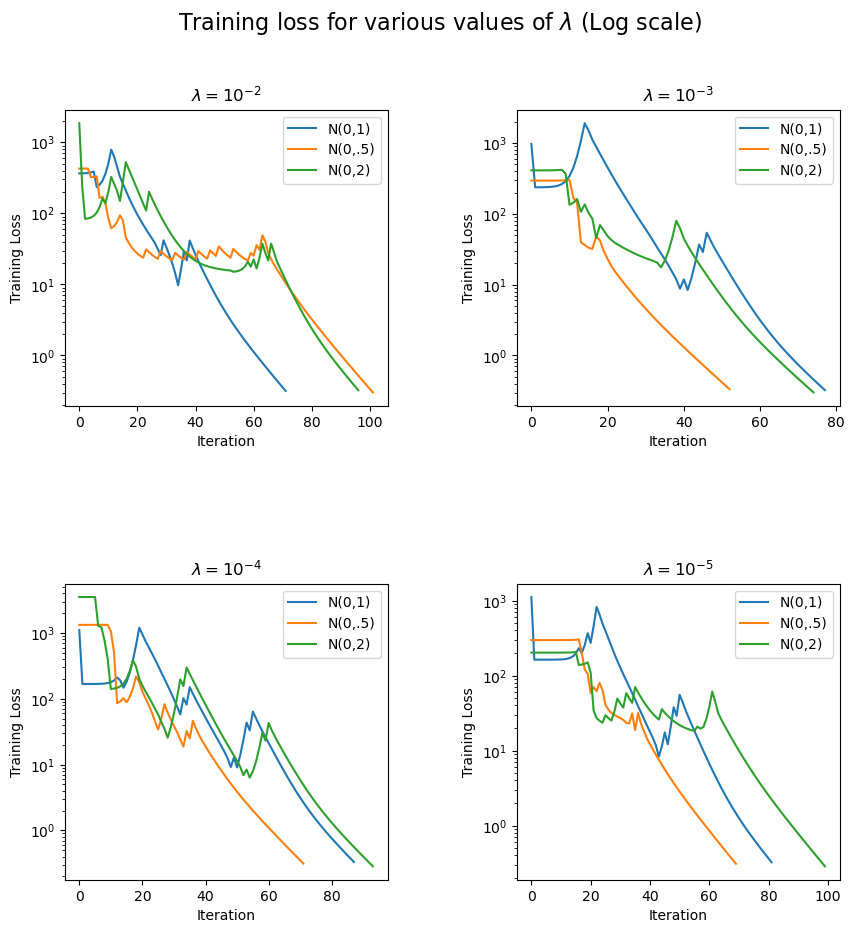

In [92]:
# add all the losses to the graph
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(loss_2, label = "N(0,1)")
plt.plot(loss_21, label = "N(0,.5)")
plt.plot(loss_22, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-2}$")
plt.legend()    
plt.yscale("log")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$ (Log scale)', fontsize=16);

plt.subplot(2,2,2)
plt.plot(loss_3, label = "N(0,1)")
plt.plot(loss_31, label = "N(0,.5)")
plt.plot(loss_32, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-3}$")
plt.legend()    
plt.yscale("log")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$ (Log scale)', fontsize=16);

plt.subplot(2,2,3)
plt.plot(loss_4, label = "N(0,1)")
plt.plot(loss_41, label = "N(0,.5)")
plt.plot(loss_42, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-4}$")
plt.legend()    
plt.yscale("log")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$ (Log scale)', fontsize=16);

plt.subplot(2,2,4)
plt.plot(loss_5, label = "N(0,1)")
plt.plot(loss_51, label = "N(0,.5)")
plt.plot(loss_52, label = "N(0,2)")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("$\lambda = 10^{-5}$")
plt.legend()    
plt.yscale("log")
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$ (Log scale)', fontsize=16);

It's evident from the plots above that the choice of $\lambda$ as well as the initialization of the algorithm affects the training loss. $\lambda = 10^{-3}$ seems to be the best choic for $\lambda$ as it converges the fastest, especially when the weights were initialized to smaller values. However, all $\lambda$ values reached roughly the same loss after a sufficient number of iterations. The weights initialized according to the distribution $N(0,.5)$ converged the fastest on average while the weights initialized according to $N(0,2)$ were the slowest to converge, but the initializations did not have much effect on the final loss. The results are summarized below:

In [107]:
print("Different lambdas:")
print("Average training loss for lambda = 10^-2: ", round((loss_2[-1] + loss_21[-1] + loss_22[-1])/3,2), ". Achieved in an average of ", round((len(loss_2) + len(loss_21) + len(loss_22))/3,2), " iterations.")
print("Average training loss for lambda = 10^-3: ", round((loss_3[-1] + loss_31[-1] + loss_32[-1])/3,2), ". Achieved in an average of ", round((len(loss_3) + len(loss_31) + len(loss_32))/3,2), " iterations.")
print("Average training loss for lambda = 10^-4: ", round((loss_4[-1] + loss_41[-1] + loss_42[-1])/3,2), ". Achieved in an average of ", round((len(loss_4) + len(loss_41) + len(loss_42))/3,2), " iterations.")
print("Average training loss for lambda = 10^-5: ", round((loss_5[-1] + loss_51[-1] + loss_52[-1])/3,2), ". Achieved in an average of ", round((len(loss_5) + len(loss_51) + len(loss_52))/3,2), "  iterations.")
print()
print("Different initializations:")
print("Average training loss for weights initialized according to N(0,.5):", round((loss_21[-1] + loss_31[-1] + loss_41[-1] + loss_51[-1])/4,2), ". Achieved in an average of ", round((len(loss_21) + len(loss_31) + len(loss_41) + len(loss_51))/4,2), " iterations.")
print("Average training loss for weights initialized according to N(0,1): ", round((loss_2[-1] + loss_3[-1] + loss_4[-1] + loss_5[-1])/4,2), ". Achieved in an average of ", round((len(loss_2) + len(loss_3) + len(loss_4) + len(loss_5))/4,2), "  iterations.")
print("Average training loss for weights initialized according to N(0,2): ", round((loss_22[-1] + loss_32[-1] + loss_42[-1] + loss_52[-1])/4,2), " . Achieved in an average of ", round((len(loss_22) + len(loss_32) + len(loss_42) + len(loss_52))/4,2), "  iterations.")

Different lambdas:
Average training loss for lambda = 10^-2:  0.31 . Achieved in an average of  90.33  iterations.
Average training loss for lambda = 10^-3:  0.32 . Achieved in an average of  68.67  iterations.
Average training loss for lambda = 10^-4:  0.31 . Achieved in an average of  84.67  iterations.
Average training loss for lambda = 10^-5:  0.31 . Achieved in an average of  84.0   iterations.

Different initializations:
Average training loss for weights initialized according to N(0,.5): 0.31 . Achieved in an average of  74.25  iterations.
Average training loss for weights initialized according to N(0,1):  0.32 . Achieved in an average of  80.0   iterations.
Average training loss for weights initialized according to N(0,2):  0.3  . Achieved in an average of  91.5   iterations.


### (b)

I'll generate sets of $N_T$ = 100 randomly generated points, $\{ \tilde{\textbf{x}}^{(1)}, \tilde{\textbf{x}}^{(2)}, ..., \tilde{\textbf{x}}^{(N_T)} \} \in \mathbb{R}^3$ such that $\text{max}\{|\tilde{x}_1^{(n)}|, |\tilde{x}_2^{(n)}|, |\tilde{x}_3^{(n)}|\} \leq \Gamma_T$ for all $n = 1,2,...,N_T$ for $\Gamma_T =$ 0.5, 0.75, 1, 1.25, and 1.5 .




One call of the function below will generate 5 sets of 100 data points (in $\mathbb{R}^3$), one set for each $\Gamma_T$ = .5, .75, 1, 1.25, 1.5, meaning a 5 x 100 x 3 array of data points between $-\Gamma_T$ and $+\Gamma_T$.

In [117]:
def calc_rand_test(num, gammas, function):
    x_test = []
    y_test = []
    for gamma in gammas:
        x, y = random_data(num = num, gamma = gamma, function = function)
        x_test.append(x)
        y_test.append(y)
    return np.array(x_test), np.array(y_test)

To test the model, I'll calculate the sum of squared error between the predicted value, $f_w(x)$ and the actual value output of the function, $g(x)$ for each $\tilde{\textbf{x}}^{(n)}$ in the test set and the set of weights generated for each $\lambda = 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}$. The sum of squared error is defined as: $$\sum_{n = 1}^{100}(f_w(\tilde{\textbf{x}}^{(n)}) - g(\tilde{\textbf{x}}^{(n)}))^2$$
I'll calculate the sum of squared error for a set of 100 points for each $\Gamma_T =$ 0.5, 0.75, 1, 1.25, and 1.5 (5 sets total), and each set of weights generated in (a), for a total of 5 * 12 = 60 calculated squared errors. I'll seperate the data based on the initialization of the algorithm ($N(0,1)$, $N(0,.5)$, $N(0,2)$).

In [138]:
def squared_error(x, y, w):
    return np.inner((f_w_vec(x, w) - y), (f_w_vec(x, w) - y))

test_x, test_y = calc_rand_test(100, [.5, .75, 1, 1.25, 1.5], lambda x_1, x_2, x_3: x_1*x_2 + x_3)
weights_05 = [weights_2, weights_3, weights_4, weights_5]
weights_01 = [weights_21, weights_31, weights_41, weights_51]
weights_02 = [weights_22, weights_32, weights_42, weights_52]
error_05 = []
error_01 = []
error_02 = []
for i in range(4):
    e05 = []
    e01 = []
    e02 = []
    for j in range(5):
        e05.append(squared_error(test_x[j], test_y[j], weights_05[i]))
        e01.append(squared_error(test_x[j], test_y[j], weights_01[i]))
        e02.append(squared_error(test_x[j], test_y[j], weights_02[i]))
    error_05.append(e05)
    error_01.append(e01)
    error_02.append(e02) 

The results are summarized in the tables below, one for each initialization of the algorithm

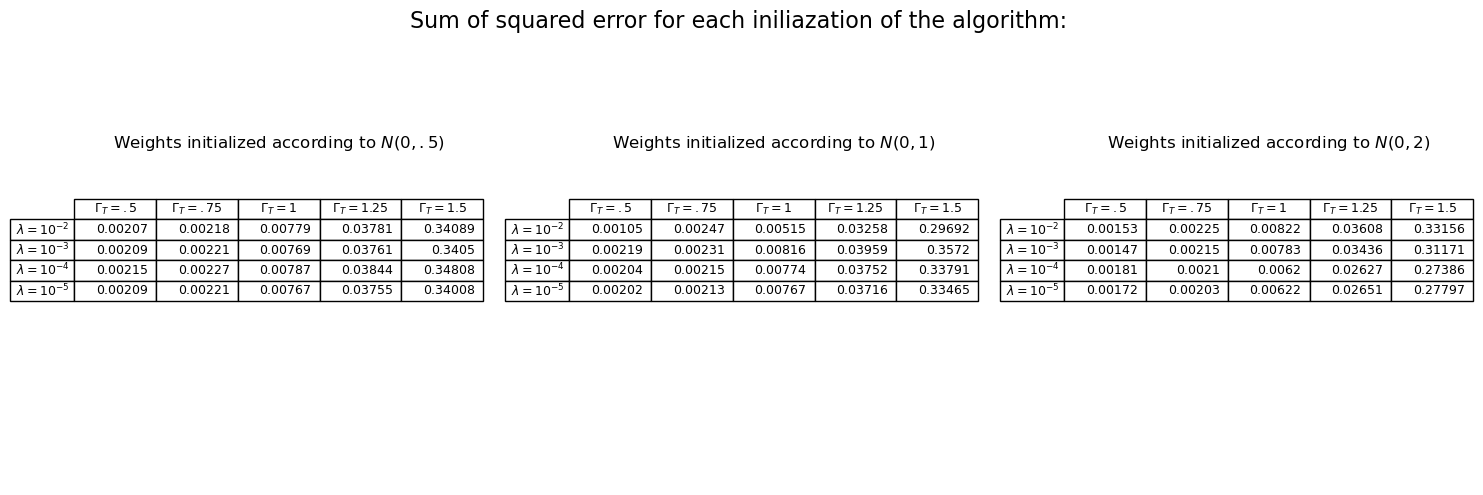

In [172]:
columns = ["$\Gamma_T = .5$", "$\Gamma_T = .75$", "$\Gamma_T = 1$", "$\Gamma_T = 1.25$", "$\Gamma_T = 1.5$"]
rows = ["$\lambda = 10^{-2}$", "$\lambda = 10^{-3}$", "$\lambda = 10^{-4}$", "$\lambda = 10^{-5}$"]
error_05 = np.array(error_05)
error_01 = np.array(error_01)
error_02 = np.array(error_02)
error_05 = np.round(error_05, 5)
error_01 = np.round(error_01, 5)
error_02 = np.round(error_02, 5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].axis('tight')
ax[0].axis('off')
ax[0].table(cellText=error_05, rowLabels=rows, colLabels=columns, loc='center')
ax[0].set_title("Weights initialized according to $N(0,.5)$", y= .7)

ax[1].axis('tight')
ax[1].axis('off')
ax[1].table(cellText=error_01, rowLabels=rows, colLabels=columns, loc='center')
ax[1].set_title("Weights initialized according to $N(0,1)$", y= .7)

ax[2].axis('tight')
ax[2].axis('off')
ax[2].table(cellText=error_02, rowLabels=rows, colLabels=columns, loc='center')
ax[2].set_title("Weights initialized according to $N(0,2)$", y= .7)

plt.tight_layout()
fig.suptitle("Sum of squared error for each iniliazation of the algorithm:", fontsize=16)
plt.show()

The initialization doesn't appear to have much effect on the results; the results in each table are very similar to eachother. However, the $\Gamma_T$ has a dramatic effect on the squared error. Generally, a smaller value of $\Gamma_T$ yielded smaller squared error. This makes sense, the model was trained on data subject to $\Gamma_T = 1$, so values in the test data larger than the training $\Gamma_T$ can produce  unpredictable results. The sum of squared error for $\Gamma_T = 1.25$ and $\Gamma_T = 1.5$ were much larger than the other values of $\Gamma_T$. This is likely because the first term of function $g(\textbf{x}) = x_1 x_2 + x_3$ behaves a bit differently when $x_1$ and $x_2$ are larger than 1, i.e., the function starts to grow much faster. For example, on one extreme, if $x_1 = x_2 = x_3 = 1.5$, $g(\textbf{x}) = 3.375$. However, the largest possible value of $g(\textbf{x})$ for the training data was 2, when $x_1 = x_2 = x_3 = 1$. Since the model is a linear approximation, it's very hard for it to predict large jumps like this. 

### (c)
Here, I'll use the function $g(\textbf{x}) = sin(x_1x_2)+x_3$. I'll repeat the exact same procedure from parts (a) and (b), making most of my code reusable once I change $x_1 x_2 + x_3$ to $sin(x_1x_2)+x_3$. 

In [176]:
def g(x_1, x_2, x_3):
    return np.sin(x_1*x_2) + x_3